# Advertising analytics

This data shows impressions (Each ad served to the user) and conversions (every moment when the user click on ad).
1. Data needs fixing (outliers, missing values, etc)
2. Calculate the last three columns
3. Optimize the business idea (maximize conversion minimizing the cost)

## Importing data

In [415]:
import numpy as np
import pandas as pd
import seaborn as sns

In [416]:
df = pd.read_excel("advertising.xlsx", header = 0)
df

,date,impressions,conversions,spend,clicks,conversion_rate,click_through_rate,cost_per_conversion
0,2020-09-01,98000,NaN,220.500,1006,NaN,NaN,NaN
1,2020-09-02,315000,NaN,708.750,1215,NaN,NaN,NaN
2,2020-09-03,627000,NaN,1410.750,630,NaN,NaN,NaN
3,2020-09-04,449500,NaN,1011.375,899,NaN,NaN,NaN
4,2020-09-05,496500,NaN,1117.125,993,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
56,2020-10-27,559500,14650.0,1258.875,1119,NaN,NaN,NaN
57,2020-10-28,566000,12310.0,1273.500,1132,NaN,NaN,NaN
58,2020-10-29,0,10620.0,0.000,0,NaN,NaN,NaN
59,2020-10-30,0,9460.0,0.000,0,NaN,NaN,NaN


In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 61 non-null     datetime64[ns]
 1   impressions          61 non-null     int64         
 2   conversions          51 non-null     float64       
 3   spend                61 non-null     float64       
 4   clicks               61 non-null     int64         
 5   conversion_rate      0 non-null      float64       
 6   click_through_rate   0 non-null      float64       
 7   cost_per_conversion  0 non-null      float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 3.9 KB


In [418]:
df.describe()

,impressions,conversions,spend,clicks,conversion_rate,click_through_rate,cost_per_conversion
count,6.100000e+01,51.000000,61.000000,61.000000,0.0,0.0,0.0
mean,4.556681e+05,9890.549020,1025.253184,923.885246,NaN,NaN,NaN
std,3.757882e+05,3741.708216,845.523449,745.497286,NaN,NaN,NaN
min,0.000000e+00,7.000000,0.000000,0.000000,NaN,NaN,NaN
25%,2.890000e+05,6900.000000,650.250000,597.000000,NaN,NaN,NaN
50%,4.560000e+05,10770.000000,1026.000000,914.000000,NaN,NaN,NaN
75%,5.660000e+05,12490.000000,1273.500000,1132.000000,NaN,NaN,NaN
max,2.482673e+06,14930.000000,5586.014250,4965.000000,NaN,NaN,NaN


In [419]:
len(df) #Length dataframe

61

I can verify there are missing values in conversion column, also, I can assume there are outlier in impressions and conversions column, beacause there are data far from Q1 and Q3. So, I will treat the outliers just in case.

## Outliers treatment

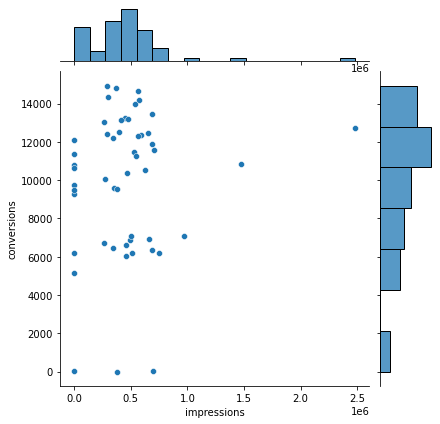

In [420]:
sns.jointplot(x = "impressions", y = "conversions", data = df)

From the graph, I can see the outliers

In [421]:
#Outliers treatment at the high values
for column in df.iloc[:,1:5]: 
    max_lim = np.nanpercentile(df[column], 84) #this is the relative distance from max value
                                                #since the minimum value is at 16% quartile
    df[column][df[column] > 3* max_lim] = 3 * max_lim

<ipython-input-421-209a14b11a4e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][df[column] > 3* max_lim] = 3 * max_lim
<ipython-input-421-209a14b11a4e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][df[column] > 3* max_lim] = 3 * max_lim
<ipython-input-421-209a14b11a4e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][df[column] > 3* max_lim] = 3 * max_lim
<ipython-input-421-209a14b11a4e>:5: Setting

In [422]:
#Outliers treatment at the low values
for column in df.iloc[:,1:5]: 
    min_lim = np.nanpercentile(df[column], 16) #This is the minimum percentage with result
                                                 #different to zero
    df[column][df[column] < 0.3* min_lim] = 0.3 * min_lim

<ipython-input-422-d3cb0ba59e16>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][df[column] < 0.3* min_lim] = 0.3 * min_lim
<ipython-input-422-d3cb0ba59e16>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][df[column] < 0.3* min_lim] = 0.3 * min_lim
<ipython-input-422-d3cb0ba59e16>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][df[column] < 0.3* min_lim] = 0.3 * min_lim


In [423]:
df.describe()

,impressions,conversions,spend,clicks,conversion_rate,click_through_rate,cost_per_conversion
count,6.100000e+01,51.000000,61.000000,61.000000,0.0,0.0,0.0
mean,4.501226e+05,10001.705882,1012.775902,922.655738,NaN,NaN,NaN
std,3.289347e+05,3458.520362,740.103021,637.917776,NaN,NaN,NaN
min,1.764000e+04,1899.000000,39.690000,95.400000,NaN,NaN,NaN
25%,2.890000e+05,6900.000000,650.250000,597.000000,NaN,NaN,NaN
50%,4.560000e+05,10770.000000,1026.000000,914.000000,NaN,NaN,NaN
75%,5.660000e+05,12490.000000,1273.500000,1132.000000,NaN,NaN,NaN
max,1.968000e+06,14930.000000,4428.000000,3936.000000,NaN,NaN,NaN


## Missing values treatment

In [424]:
for column in df.iloc[:,1:5]: 
    df[column] = df[column].fillna(df[column].mean())

In [425]:
df.head()

,date,impressions,conversions,spend,clicks,conversion_rate,click_through_rate,cost_per_conversion
0,2020-09-01,98000.0,10001.705882,220.500,1006.0,NaN,NaN,NaN
1,2020-09-02,315000.0,10001.705882,708.750,1215.0,NaN,NaN,NaN
2,2020-09-03,627000.0,10001.705882,1410.750,630.0,NaN,NaN,NaN
3,2020-09-04,449500.0,10001.705882,1011.375,899.0,NaN,NaN,NaN
4,2020-09-05,496500.0,10001.705882,1117.125,993.0,NaN,NaN,NaN


In [426]:
df.describe()

,impressions,conversions,spend,clicks,conversion_rate,click_through_rate,cost_per_conversion
count,6.100000e+01,61.000000,61.000000,61.000000,0.0,0.0,0.0
mean,4.501226e+05,10001.705882,1012.775902,922.655738,NaN,NaN,NaN
std,3.289347e+05,3157.182696,740.103021,637.917776,NaN,NaN,NaN
min,1.764000e+04,1899.000000,39.690000,95.400000,NaN,NaN,NaN
25%,2.890000e+05,7090.000000,650.250000,597.000000,NaN,NaN,NaN
50%,4.560000e+05,10001.705882,1026.000000,914.000000,NaN,NaN,NaN
75%,5.660000e+05,12380.000000,1273.500000,1132.000000,NaN,NaN,NaN
max,1.968000e+06,14930.000000,4428.000000,3936.000000,NaN,NaN,NaN


## Columns calculations

In [427]:
df["spend"] = 2.25 * df["impressions"] / 1000 #This formula is given by excel file
df["conversion_rate"] = np.round(100 * df["conversions"] / df["impressions"], decimals = 4)
df["click_through_rate"] = np.round(100 * df["clicks"] / df["impressions"], decimals = 4)
df["cost_per_conversion"] = np.round(df["spend"] / df["conversions"], decimals = 4)


In [428]:
df.describe()

,impressions,conversions,spend,clicks,conversion_rate,click_through_rate,cost_per_conversion
count,6.100000e+01,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,4.501226e+05,10001.705882,1012.775902,922.655738,10.044766,0.270818,0.119770
std,3.289347e+05,3157.182696,740.103021,637.917776,18.875106,0.162430,0.127489
min,1.764000e+04,1899.000000,39.690000,95.400000,0.273000,0.100500,0.003300
25%,2.890000e+05,7090.000000,650.250000,597.000000,1.676200,0.200000,0.056400
50%,4.560000e+05,10001.705882,1026.000000,914.000000,2.225100,0.200000,0.101100
75%,5.660000e+05,12380.000000,1273.500000,1132.000000,3.986600,0.200000,0.134200
max,1.968000e+06,14930.000000,4428.000000,3936.000000,68.594100,1.026500,0.824100


There are no more outliers and missing values, so I will continue wit the business idea

## Optimization

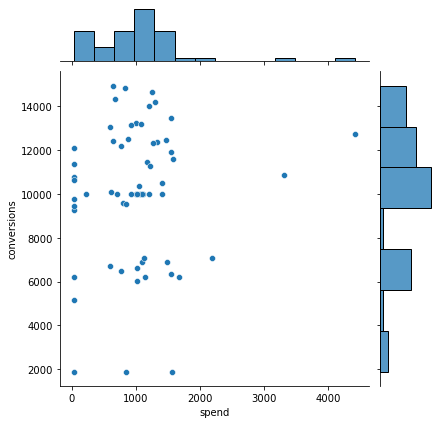

In [429]:
sns.jointplot(x = "spend", y = "conversions", data = df)

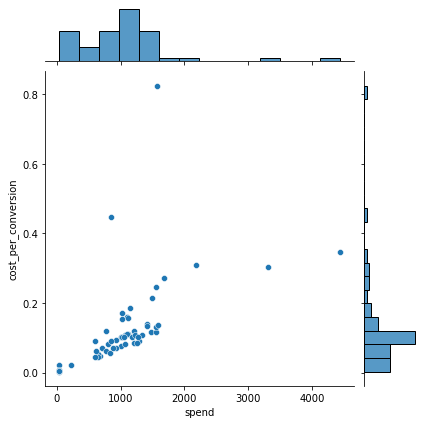

In [430]:
sns.jointplot(x = "spend", y = "cost_per_conversion", data = df)

In [431]:
df.corr()

,impressions,conversions,spend,clicks,conversion_rate,click_through_rate,cost_per_conversion
impressions,1.000000,0.112873,1.000000,0.972809,-0.576595,-0.563905,0.594560
conversions,0.112873,1.000000,0.112873,0.109772,0.005540,-0.148569,-0.467619
spend,1.000000,0.112873,1.000000,0.972809,-0.576595,-0.563905,0.594560
clicks,0.972809,0.109772,0.972809,1.000000,-0.560156,-0.429014,0.574269
conversion_rate,-0.576595,0.005540,-0.576595,-0.560156,1.000000,0.721812,-0.413203
click_through_rate,-0.563905,-0.148569,-0.563905,-0.429014,0.721812,1.000000,-0.385648
cost_per_conversion,0.594560,-0.467619,0.594560,0.574269,-0.413203,-0.385648,1.000000


For the analysis, I just need conversions, spend and cos_per_conversion columns, because that is the business idea, and the other variables are not correlated with conversions

In [432]:
del df["impressions"]
del df["clicks"]
del df["conversion_rate"]
del df["click_through_rate"]

In [433]:
df.corr()

,conversions,spend,cost_per_conversion
conversions,1.000000,0.112873,-0.467619
spend,0.112873,1.000000,0.594560
cost_per_conversion,-0.467619,0.594560,1.000000


At this moment, I will transform variables to identify if there is a higher correlations

In [434]:
df["log_conversions"] = np.log(df["conversions"])
df["log_spend"] = np.log(df["spend"])
df["log_cost"] = np.log(df["cost_per_conversion"])
df["sqrt_conversions"] = np.sqrt(df["conversions"])
df["sqrt_spend"] = np.sqrt(df["spend"])
df["sqrt_cost"] = np.sqrt(df["cost_per_conversion"])

In [435]:
df.corr()

,conversions,spend,cost_per_conversion,log_conversions,log_spend,log_cost,sqrt_conversions,sqrt_spend,sqrt_cost
conversions,1.000000,0.112873,-0.467619,0.949339,0.166232,-0.162217,0.988834,0.140324,-0.358951
spend,0.112873,1.000000,0.594560,0.103109,0.786993,0.745283,0.109381,0.937161,0.742943
cost_per_conversion,-0.467619,0.594560,1.000000,-0.554077,0.521701,0.708612,-0.514128,0.594767,0.929142
log_conversions,0.949339,0.103109,-0.554077,1.000000,0.150482,-0.195312,0.985431,0.127669,-0.410738
log_spend,0.166232,0.786993,0.521701,0.150482,1.000000,0.940181,0.159819,0.950663,0.777019
log_cost,-0.162217,0.745283,0.708612,-0.195312,0.940181,1.000000,-0.181021,0.899150,0.912464
sqrt_conversions,0.988834,0.109381,-0.514128,0.985431,0.159819,-0.181021,1.000000,0.135356,-0.388396
sqrt_spend,0.140324,0.937161,0.594767,0.127669,0.950663,0.899150,0.135356,1.000000,0.810878
sqrt_cost,-0.358951,0.742943,0.929142,-0.410738,0.777019,0.912464,-0.388396,0.810878,1.000000


In [436]:
df.describe()

,conversions,spend,cost_per_conversion,log_conversions,log_spend,log_cost,sqrt_conversions,sqrt_spend,sqrt_cost
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,10001.705882,1012.775902,0.119770,9.134590,6.446786,-2.687597,98.389809,29.270619,0.308584
std,3157.182696,740.103021,0.127489,0.452157,1.301755,1.311666,18.069418,12.593923,0.157973
min,1899.000000,39.690000,0.003300,7.549083,3.681099,-5.713833,43.577517,6.300000,0.057446
25%,7090.000000,650.250000,0.056400,8.866441,6.477357,-2.875286,84.202138,25.500000,0.237487
50%,10001.705882,1026.000000,0.101100,9.210511,6.933423,-2.291645,100.008529,32.031235,0.317962
75%,12380.000000,1273.500000,0.134200,9.423838,7.149524,-2.008424,111.265448,35.686132,0.366333
max,14930.000000,4428.000000,0.824100,9.611128,8.395703,-0.193463,122.188379,66.543219,0.907800


Applying different transformations to different variables, we identify the best correlation is log_cost - log_spend

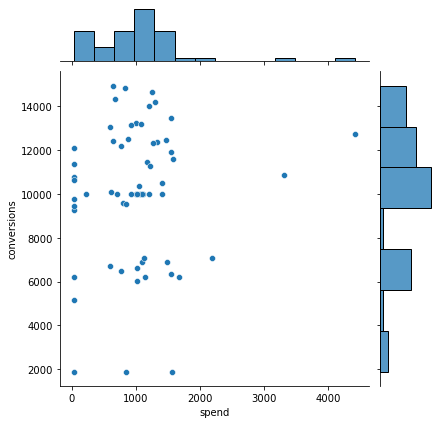

In [448]:
sns.jointplot(x = "spend", y = "conversions", data = df)

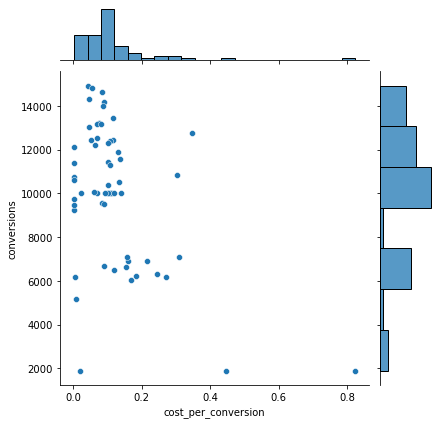

In [437]:
sns.jointplot(x = "cost_per_conversion", y = "conversions", data = df)

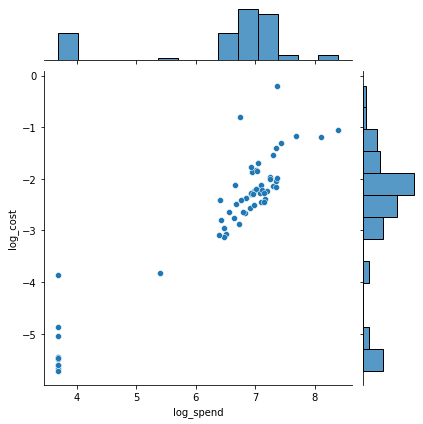

In [449]:
sns.jointplot(x = "log_spend", y = "log_cost", data = df)

## Linear regression

In [438]:
from sklearn.linear_model import LinearRegression
y = df["conversions"]
x = df[["cost_per_conversion"]]

In [439]:
lm = LinearRegression()

In [440]:
lm.fit(x, y)

LinearRegression()

In [441]:
print(lm.intercept_, lm.coef_)

11388.680860944283 [-11580.27288449]


In [442]:
lm.score(x, y)

0.2186676966995692

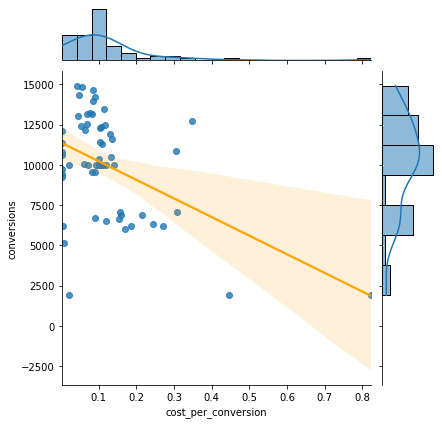

In [443]:
sns.jointplot(x = "cost_per_conversion", y = "conversions", data = df, kind = "reg", joint_kws = {"line_kws" : {"color": "orange"}})

In [444]:
np.where(lm.predict(x) == lm.predict(x).max())

(array([38], dtype=int64),)

In [445]:
x["cost_per_conversion"][38] * lm.predict(x)[38]

37.45653766940406

In [446]:
lm.predict(x)[38]

11350.465960425472

In [447]:
x["cost_per_conversion"][38]

0.0033

Other relation I can check is log_cost - log_spend

In [450]:
x = df[["log_spend"]]
y = df["log_cost"]
lm = LinearRegression()

In [451]:
lm.fit(x, y)

LinearRegression()

In [452]:
print(lm.intercept_, lm.coef_)

-8.794888661361497 [0.94733892]


In [453]:
lm.score(x, y)

0.8839409603298779

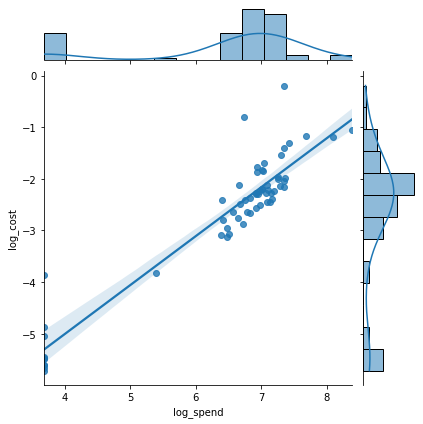

In [455]:
sns.jointplot(x = "log_spend", y = "log_cost", data = df, kind = "reg")

In [458]:
np.where(np.exp(lm.predict(x)) == np.exp(lm.predict(x).min())) 

(array([30, 31, 37, 38, 44, 45, 51, 52, 58, 59], dtype=int64),)

In [459]:
np.exp(x["log_spend"][30]) /np.exp(lm.predict(x))[30] #Conversion opt

8012.349432449223

In [461]:
np.exp(x["log_spend"][30]) #Spend opt

39.689999999999976

In [462]:
np.log(1000)

6.907755278982137

# Conclusions
I cleaned data and treated it, with the result conversion does not follow a linear correlation, but the graphs let be clear that the business does not need pay a lot of money to obtain conversions, this company, with 1000 dollar or less, obtains the maximun conversion.